# Descriptive analysis for news headlines and stock data
This analysis covers the following topics:
* Date distribution (by year)
* Stocks
    * What was the max closing price? Min closing price?
    * How has trading volume for the Dow Jones Industrial Average (DJIA) changed over time?
    * How has the DJIA changed over time (closing price)?
    * Number of days above average and below average each year
    * What are the main topics on days that are above mean stock price?
    * What are the topics on days that are below mean stock price?
* News headlines
    * Keyword distribution
    * Top keyword distribution over time
    * How many keywords are used across all news headlines in our data?
    * How do news headline topics change over time?

In [1]:
from matplotlib import pyplot as plt
import pandas as pd

# Import and clean data

In [2]:
# Headline data
headlines = pd.read_csv("../Data/RedditNews.csv")

# DJIA stock data
djia = pd.read_csv("../Data/upload_DJIA_table.csv")

In [3]:
# Drop nulls
djia.dropna(how="any", inplace=True)
headlines.dropna(how="any", inplace=True)

In [4]:
# Review data
djia.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [5]:
headlines.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


# Date distribution by year

In [6]:
# Get year data from 'Date column'
import datetime
import seaborn as sns

# Convert the column to datetime, parse out year, then reassign to column
djia['Date'] = pd.to_datetime(djia['Date'], format="%Y-%m-%d")
djia['Year'] = djia['Date'].dt.year
djia['Volume (Millions)'] = djia['Volume'] / 1000000
djia.head()

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Volume (Millions)
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,2016,82.16
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,2016,133.03
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,2016,106.38
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,2016,112.19
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,2016,138.74


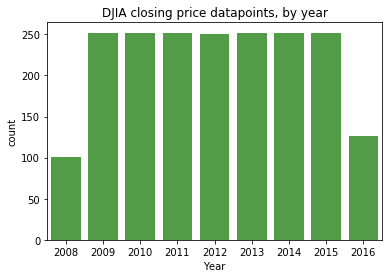

In [14]:
# Plot year value counts
ax = sns.countplot(djia['Year'], color='#47a939')
ax.set(title='DJIA closing price datapoints, by year')
plt.savefig('../Images/exploratory_djia_close_distribution.png', optimize=True)
plt.show()

### Results
The data in our dataset ranges from late 2008 to mid 2016. From 2009-2015, complete weekday DJIA closing price data was collected for all years except 2012.

# Explore the stock data

In [15]:
# What was the max closing price? Min closing price?
djia_max = djia['Close'].max()
djia_min = djia['Close'].min()
djia_max_date = djia['Date'][djia['Close'] == djia_max]
djia_min_date = djia['Date'][djia['Close'] == djia_min]

print(f"The maximum closing price of the DJIA was {djia_max} on {djia_max_date.loc[283]}.")
print(f"The minimum closing price of the DJIA was {djia_min} on {djia_min_date.loc[1843]}.")

The maximum closing price of the DJIA was 18312.390625 on 2015-05-19 00:00:00.
The minimum closing price of the DJIA was 6547.049805 on 2009-03-09 00:00:00.


In [16]:
# Number of days above average and below average each year
djia_median = djia['Close'].median()
print(f"The mean closing price of the DJIA was {djia_median}.")

The mean closing price of the DJIA was 13025.580078.


In [17]:
# What was the max trading volume? Min trading volume?
djia_vol_max = djia['Volume (Millions)'].max()
djia_vol_min = djia['Volume (Millions)'].min()
djia_vol_max_date = djia['Date'][djia['Volume (Millions)'] == djia_vol_max]
djia_vol_min_date = djia['Date'][djia['Volume (Millions)'] == djia_vol_min]

print(f"The maximum trading volume of the DJIA was {djia_vol_max} million on {djia_vol_max_date.loc[1944]}.")
print(f"The minimum trading volume of the DJIA was {djia_vol_min} million on {djia_vol_min_date.loc[1133]}.")

The maximum trading volume of the DJIA was 674.92 million on 2008-10-10 00:00:00.
The minimum trading volume of the DJIA was 8.41 million on 2011-12-29 00:00:00.


In [18]:
djia['Date'].min()

Timestamp('2008-08-08 00:00:00')

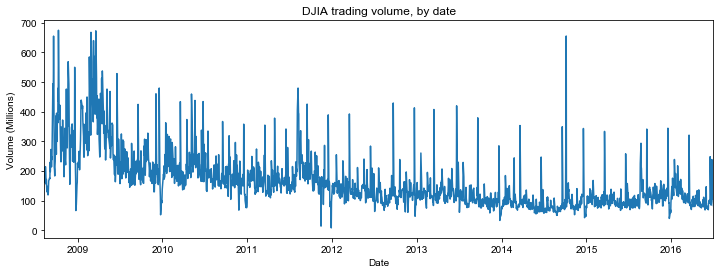

In [20]:
# How has trading volume for the Dow Jones Industrial Average (DJIA) changed over time?
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

with sns.axes_style("ticks"):
    ax = sns.lineplot(x="Date", y="Volume (Millions)", ax=ax, data=djia)
    ax.set_xlim(djia['Date'].min(), djia['Date'].max())
    ax.set(title='DJIA trading volume, by date')
    plt.savefig('../Images/exploratory_djia_tradevol_date.png', optimize=True)
    plt.show()

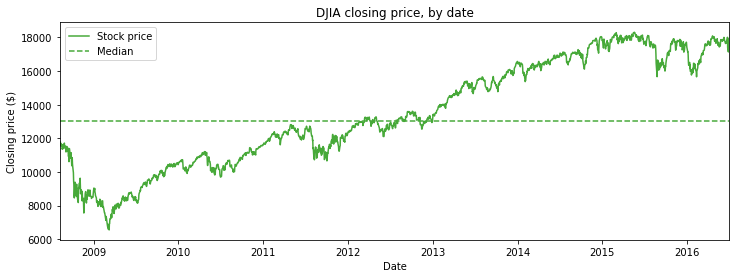

In [21]:
# How has the DJIA changed over time (closing price)?
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.lineplot(x='Date', y='Close', ax=ax, data=djia,color='#47a939')
ax.set(title='DJIA closing price, by date', ylabel='Closing price ($)')
ax.axhline(djia_median, ls='--', color='#47a939', label='Median')
ax.set_xlim(djia['Date'].min(), djia['Date'].max())
plt.legend(labels = ['Stock price', 'Median'])
plt.savefig('../Images/exploratory_djia_close_date.png', optimize=True)
plt.show()

### Results
As expected, the DJIA was affected by the 2008 financial crisis. 

Daily trading volume varied considerably through mid-2009, but evened out not long after.

Overall, the DJIA closing price followed a linear growth trend from 2009 onward, surpassing the median closing price in early 2013 (after which it did not dip back down).

Other findings:
* The maximum closing price of the DJIA was 18312.390625 on 2015-05-19.
* The minimum closing price of the DJIA was 6547.049805 on 2009-03-09.
* The mean closing price of the DJIA was 13025.580078.
* The maximum trading volume of the DJIA was 674.92 million on 2008-10-10.
* The minimum trading volume of the DJIA was 8.41 million on 2011-12-29.

# Explore news headlines

* Keyword distribution
* Top keyword distribution over time
* How many keywords are used across all news headlines in our data?
* How do news headline topics change over time?
* What are the main keywords on days that are above median stock price?
* What are the keywords on days that are below median stock price?

## NLTK `FreqDist` keyword analysis
Based on a simple count of how often words and phrases appear in news headlines for our entire dataset, what can we learn?

The average headline was 10.1 words long.

Keyword analysis revealed some high-level trends having to do with particular countries ('China', 'Korea') and concepts ('government', 'police', 'kill'). Overall, these keywords were not particularly enlightening.

In extending the analysis to bigrams (two co-occuring words) and trigrams (three co-occuring words), we see more specific topics begin to appear ('Julian Assange', 'Hong Kong', 'Islamic State', 'Trans Pacific Partnership', 'Chancellor Angela Merkel').

Of the top 10 single-word headlines, use of the terms appeared consistent over time, with the exception of "Israel", which peaked in 2009, likely due to that year's controversial Israeli military operation, "Operation Cast Lead".

In comparing the most popular headline keywords from when the DJIA was above/below average, we found no notable trends that could not be explained by the fact that the DJIA was generally on an upward trajectory from 2009 onward. Thus, popular keywords were simply related to the point in time at which they occurred, and did not appear to have an affect on the DJIA overall.

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import numpy as np
np.random.seed(22)

[nltk_data] Downloading package wordnet to /Users/stacy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/stacy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Preprocess headline text

In [23]:
# Preprocess the headline data
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v') 

# Remove stopwords and words shorter than 3 characters, then lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

In [24]:
# Apply the preprocessing functions to the headlines
headlines['cleaned_headlines'] = headlines['News'].apply(preprocess)

In [25]:
# Combine all cleaned and lemmatized headline tokens into a single "document"

all_words = ""

for l in headlines['cleaned_headlines']:
    new_line = ""
    for w in l:
        new_line += " " + w
    all_words += " " + new_line

# Print the first hundred characters in the string to confirm that it is working correctly
all_words[:101]

'  year woman mexico city finally receive birth certificate die hours later trinidad alvarez lira wait'

## Count word distribution across all headlines

In [26]:
# Tokenize all words in the document so we can plot the most used words across all headlines
words = nltk.tokenize.word_tokenize(all_words)
fd = nltk.FreqDist(words)

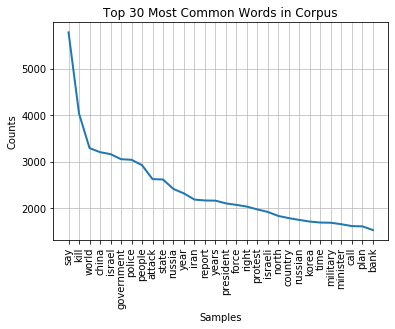

In [32]:
fd.plot(30, title='Top 30 Most Common Words in Corpus')

In [33]:
# How many keywords total across all headlines in our dataset?
keywords = len(words)

print(f"There were {keywords} keywords used across all headlines in the dataset.")

There were 740725 keywords used across all headlines in the dataset.


In [34]:
headlines['headline_len'] = headlines['cleaned_headlines'].apply(len)
headlines.head()

,Date,News,cleaned_headlines,headline_len
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,"[year, woman, mexico, city, finally, receive, ...",18
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,"[chief, back, athens, permanent, olympic, host]",6
2,2016-07-01,"The president of France says if Brexit won, so...","[president, france, say, brexit, donald, trump]",6
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,"[british, police, hours, notice, threaten, hun...",15
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,"[nobel, laureates, urge, greenpeace, stop, opp...",7


In [35]:
avg_words = headlines['headline_len'].mean()
print(f"The average headline length was {round(avg_words,1)} words long.")

The average headline length was 10.1 words long.


(('north', 'korea'), 1102)
(('prime', 'minister'), 765)
(('human', 'right'), 724)
(('saudi', 'arabia'), 583)
(('unite', 'state'), 492)
(('islamic', 'state'), 445)
(('south', 'korea'), 349)
(('climate', 'change'), 326)
(('west', 'bank'), 321)
(('north', 'korean'), 294)
(('middle', 'east'), 284)
(('julian', 'assange'), 242)
(('vladimir', 'putin'), 238)
(('hong', 'kong'), 235)
(('south', 'africa'), 229)
(('kill', 'people'), 228)
(('edward', 'snowden'), 228)
(('court', 'rule'), 220)
(('police', 'officer'), 212)
(('shoot', 'dead'), 211)


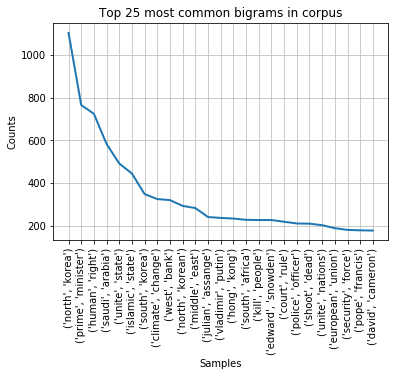

In [37]:
# How many terms (word pairs) appear across all headlines?

# https://inzaniak.github.io/pybistuffblog/posts/2017/February/nltk-counting-words
# Get Bigrams from text
bigrams = nltk.bigrams(words)
# Calculate Frequency Distribution for Bigrams
freq_bi = nltk.FreqDist(bigrams)

# Print and plot most common bigrams
for phrase in freq_bi.most_common(20):
    print(phrase)
freq_bi.plot(25, title="Top 25 most common bigrams in corpus")

(('nobel', 'peace', 'prize'), 87)
(('president', 'vladimir', 'putin'), 78)
(('great', 'barrier', 'reef'), 75)
(('human', 'right', 'watch'), 75)
(('nuclear', 'power', 'plant'), 73)
(('president', 'barack', 'obama'), 65)
(('president', 'bashar', 'assad'), 62)
(('human', 'right', 'group'), 60)
(('female', 'genital', 'mutilation'), 50)
(('founder', 'julian', 'assange'), 47)
(('chancellor', 'angela', 'merkel'), 46)
(('human', 'right', 'abuse'), 46)
(('wikileaks', 'founder', 'julian'), 45)
(('trans', 'pacific', 'partnership'), 42)
(('sentence', 'years', 'prison'), 39)
(('world', 'health', 'organization'), 39)
(('fukushima', 'nuclear', 'plant'), 39)
(('international', 'criminal', 'court'), 39)
(('human', 'right', 'council'), 38)
(('russian', 'president', 'vladimir'), 38)


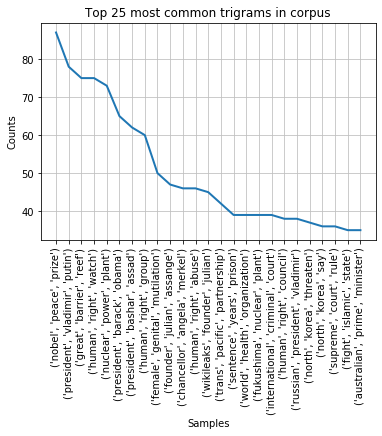

In [39]:
# How many terms (word triples) appear across all headlines?

# https://inzaniak.github.io/pybistuffblog/posts/2017/February/nltk-counting-words
# Get Bigrams from text
trigrams = nltk.trigrams(words)
# Calculate Frequency Distribution for Bigrams
freq_tri = nltk.FreqDist(trigrams)

# Print and plot most common bigrams
for phrase in freq_tri.most_common(20):
    print(phrase)
freq_tri.plot(25, title="Top 25 most common trigrams in corpus")

## Headline changes over time
* For each headline, count how often each of the top 10 terms appear per month over all time
* Plot it

In [40]:
top_20 = fd.most_common(20)

cleaned = []
not_useful = ['say', 'people', 'year', 'years', 'report', 'force', 'right']

for keyword in top_20:
    word = keyword[0]
    if word not in not_useful:
        cleaned.append(word)
    else: 
        pass
    
print(cleaned)

['kill', 'world', 'china', 'israel', 'government', 'police', 'attack', 'state', 'russia', 'iran', 'president', 'protest', 'israeli']


In [41]:
headlines.head()

,Date,News,cleaned_headlines,headline_len
0,2016-07-01,A 117-year-old woman in Mexico City finally re...,"[year, woman, mexico, city, finally, receive, ...",18
1,2016-07-01,IMF chief backs Athens as permanent Olympic host,"[chief, back, athens, permanent, olympic, host]",6
2,2016-07-01,"The president of France says if Brexit won, so...","[president, france, say, brexit, donald, trump]",6
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...,"[british, police, hours, notice, threaten, hun...",15
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...,"[nobel, laureates, urge, greenpeace, stop, opp...",7


In [42]:
headlines.set_index(keys=['Date'], inplace=True)

In [43]:
headlines['cleaned_headlines'] = headlines['cleaned_headlines'].str.join(" ")

In [44]:
# https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html
pop_kw = pd.DataFrame(dict((kw, headlines.cleaned_headlines.str.contains(kw, re.IGNORECASE))
                             for kw in cleaned))
pop_kw.head()

,kill,world,china,israel,government,police,attack,state,russia,iran,president,protest,israeli
Date,,,,,,,,,,,,,
2016-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False
2016-07-01,False,False,False,False,False,False,False,False,False,False,True,False,False
2016-07-01,False,False,False,False,False,True,False,False,False,False,False,False,False
2016-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
# Groupby date/month, get sum of each keyword on date

keyword_by_date = pop_kw.groupby('Date')[cleaned].sum()

In [46]:
keyword_by_date['date'] = keyword_by_date.index
keyword_by_date['date'] = pd.to_datetime(keyword_by_date['date'], format="%Y-%m-%d")
keyword_by_date['Year'] = keyword_by_date['date'].dt.year

keyword_by_date.head()

,kill,world,china,israel,government,police,attack,state,russia,iran,president,protest,israeli,date,Year
Date,,,,,,,,,,,,,,,
2008-06-08,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2008-06-08,2008
2008-06-09,0.0,0.0,0.0,1.0,1.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,1.0,2008-06-09,2008
2008-06-10,0.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,5.0,0.0,1.0,0.0,2008-06-10,2008
2008-06-11,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,2008-06-11,2008
2008-06-12,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,0.0,2008-06-12,2008


In [47]:
keyword_count_year = keyword_by_date.groupby('Year')[cleaned[0:6]].sum()

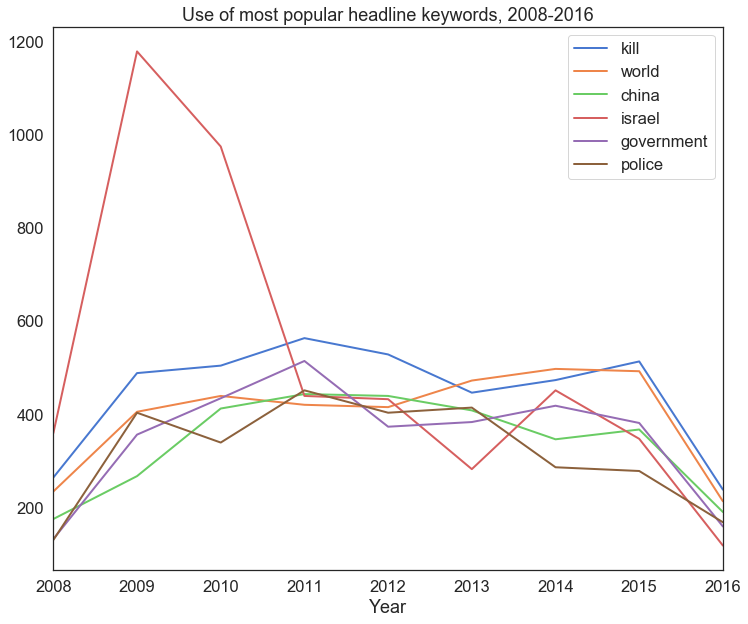

In [54]:
sns.set(font_scale=1.5, rc={"lines.linewidth": 2})
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=[12,10])
    ax = sns.lineplot(data=keyword_count_year, ax=ax, palette="muted", dashes=False)
    ax.set_xlim(keyword_count_year.index.min(), keyword_count_year.index.max())
    ax.set_title('Use of most popular headline keywords, 2008-2016')
    plt.savefig('../Images/exploratory_popular_words.png')

In [55]:
headlines_djia = pd.read_csv('../Data/Combined_News_DJIA.csv', encoding="iso-8859-1")
headlines_djia.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## Most popular headline keywords when DJIA is above/below average

In [56]:
headlines_djia['Date'] = pd.to_datetime(headlines_djia['Date'], format="%Y-%m-%d")

In [57]:
djia_price_headlines = headlines_djia.merge(djia, on="Date")

In [58]:
above_avg = djia_price_headlines[djia_price_headlines['Close'] >= djia_median]
below_avg = djia_price_headlines[djia_price_headlines['Close'] < djia_median]

In [59]:
# Clean and lemmatize above_avg headlines 
above_avg.loc[:,'combined_headlines'] = above_avg.loc[:,'Top1'] + " " + above_avg.loc[:,'Top2'] \
                                        + " " + above_avg.loc[:,'Top3'] + " " + above_avg.loc[:,'Top4'] \
                                        + " " + above_avg.loc[:,'Top5'] + " " + above_avg.loc[:,'Top6'] \
                                        + " " + above_avg.loc[:,'Top7'] + " " + above_avg.loc[:,'Top8'] \
                                        + " " + above_avg.loc[:,'Top9'] + " " + above_avg.loc[:,'Top10'] \
                                        + " " + above_avg.loc[:,'Top11'] + " " + above_avg.loc[:,'Top12'] \
                                        + " " + above_avg.loc[:,'Top13'] + " " + above_avg.loc[:,'Top14'] \
                                        + " " + above_avg.loc[:,'Top15'] + " " + above_avg.loc[:,'Top16'] \
                                        + " " + above_avg.loc[:,'Top17'] + " " + above_avg.loc[:,'Top18'] \
                                        + " " + above_avg.loc[:,'Top19'] + " " + above_avg.loc[:,'Top20'] \
                                        + " " + above_avg.loc[:,'Top21'] + " " + above_avg.loc[:,'Top22'] \
                                        + " " + above_avg.loc[:,'Top23'] + " " + above_avg.loc[:,'Top24'] \
                                        + " " + above_avg.loc[:,'Top25']

# above_avg['combined_headlines'] = above_avg['combined_headlines'].str.replace('[\.\\\'\n\(\)\"\%\-:]+', ' ')

above_avg['combined_headlines'] = above_avg['combined_headlines'].apply(preprocess)

above_avg.iloc[905]

/Users/stacy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/stacy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/stacy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Date                                                2016-02-25 00:00:00
Label                                                                 1
Top1                  770,000 names deleted from voter register in c...
Top2                  Ontario makes college tuition free for low inc...
Top3                  Arctic warming: Rapidly increasing temperature...
Top4                  ISIS suddenly trapped as Syrian Army pushes to...
Top5                  An 11,000-year-old pendant has been found, the...
Top6                  Greenland: 'Ice sheet is now losing about 8,00...
Top7                  Coptic Christian teenagers sentenced to 5 year...
Top8                  UBS charged with tax fraud and money launderin...
Top9                  The US Said India's Solar Power Plan Discrimin...
Top10                 North Korea's state media has called for an at...
Top11                 Report: thousands of refugees 'disappear' afte...
Top12                 Islamists match Odins soldiers with Soldie

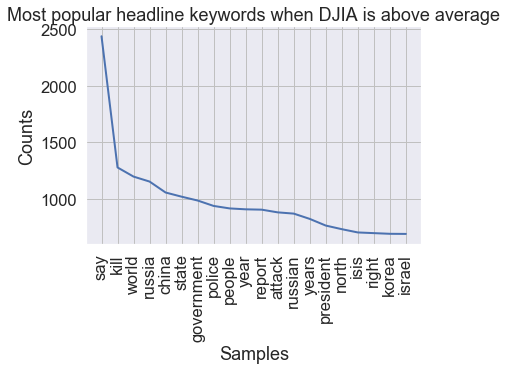

In [60]:
# Combine all cleaned and lemmatized headline tokens back into a single document, then list
all_words = ""

for l in above_avg['combined_headlines']:
    new_line = ""
    for w in l:
        new_line += " " + w
    all_words += " " + new_line

# Print the first hundred characters in the string to confirm that it is working correctly
all_words[:101]

words = nltk.tokenize.word_tokenize(all_words)
fd = nltk.FreqDist(words)
fd.plot(20, title="Most popular headline keywords when DJIA is above average")

In [61]:
# Clean and lemmatize above_avg headlines 
below_avg.loc[:,'combined_headlines'] = below_avg.loc[:,'Top1'] + " " + below_avg.loc[:,'Top2'] \
                                        + " " + below_avg.loc[:,'Top3'] + " " + below_avg.loc[:,'Top4'] \
                                        + " " + below_avg.loc[:,'Top5'] + " " + below_avg.loc[:,'Top6'] \
                                        + " " + below_avg.loc[:,'Top7'] + " " + below_avg.loc[:,'Top8'] \
                                        + " " + below_avg.loc[:,'Top9'] + " " + below_avg.loc[:,'Top10'] \
                                        + " " + below_avg.loc[:,'Top11'] + " " + below_avg.loc[:,'Top12'] \
                                        + " " + below_avg.loc[:,'Top13'] + " " + below_avg.loc[:,'Top14'] \
                                        + " " + below_avg.loc[:,'Top15'] + " " + below_avg.loc[:,'Top16'] \
                                        + " " + below_avg.loc[:,'Top17'] + " " + below_avg.loc[:,'Top18'] \
                                        + " " + below_avg.loc[:,'Top19'] + " " + below_avg.loc[:,'Top20'] \
                                        + " " + below_avg.loc[:,'Top21'] + " " + below_avg.loc[:,'Top22'] \
                                        + " " + below_avg.loc[:,'Top23'] + " " + below_avg.loc[:,'Top24'] \
                                        + " " + below_avg.loc[:,'Top25']

below_avg.loc[:,'combined_headlines'] = below_avg.loc[:,'combined_headlines'].str.replace('b[\'\"]', ' ')
below_avg.dropna(how='any', inplace=True)

below_avg.loc[:,'combined_headlines'] = below_avg.loc[:,'combined_headlines'].apply(preprocess)

/Users/stacy/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


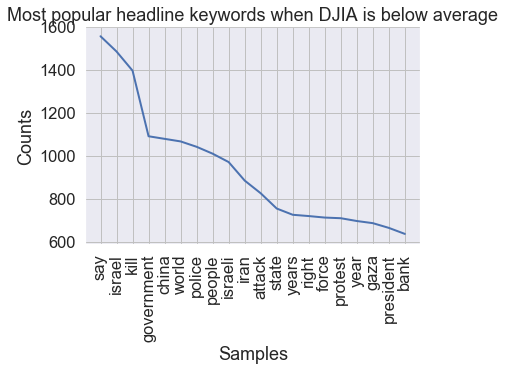

In [63]:
# Combine all cleaned and lemmatized headline tokens back into a single document, then list
all_words = ""

for l in below_avg['combined_headlines']:
    new_line = ""
    for w in l:
        new_line += " " + w
    all_words += " " + new_line

words = nltk.tokenize.word_tokenize(all_words)
fd = nltk.FreqDist(words)
fd.plot(20, title="Most popular headline keywords when DJIA is below average")